<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_B_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 2 - Hanson Nguyen

# **17.4 Lagrange Polynomial Interpolation**


---

The Lagrange polynomial interpolation finds a single polynomial that passes through each data point. The Lagrange polynomial, $L(x)$ achieves this by being a linear combination of individual polynomials, referred to as Lagrange basis polynomials: $P_i(x) = \Pi_{i=1, i \neq j}^n \frac{x-x_j}{x_i-x_j}$ where $x_i$ and $x_j$ are independent data points that correspond to dependent data points $y_i$. The Lagrange polynomial can then be written out as $L(x) = \sum_{i=1}^ny_iP_i(x)$. A couple of properties we might notice immediately is that $P_i(x_j) = 0$ and $P_i(x_i) = 1$. This ensures that the Lagrange basis polynomials equate to $1$ only when its corresponding $x_i$ data point is inputted. It is then multiplied by its corresponding $y_i$ in the Lagrange polynomial to obtain the corresponding dependent data point.

In [9]:
# import packages
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('ggplot')

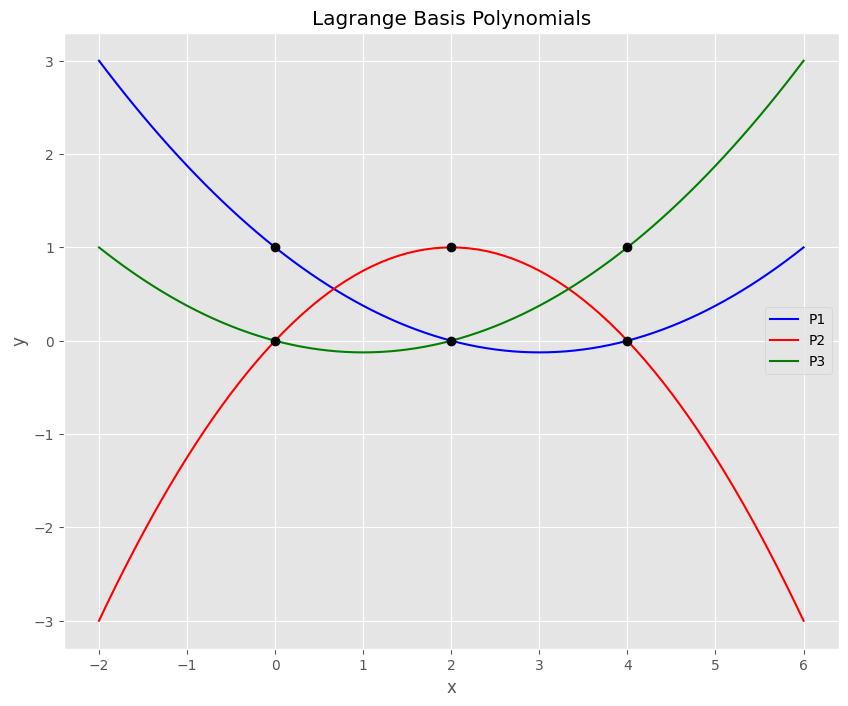

In [31]:
x = [0, 2, 4]
y = [2, -3, 4]

P1_coeff = [1, -0.75, 0.125]
P2_coeff = [0, 1,-1/4]
P3_coeff = [0,-.25,.125]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-2.0, 6.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.legend()
plt.show()

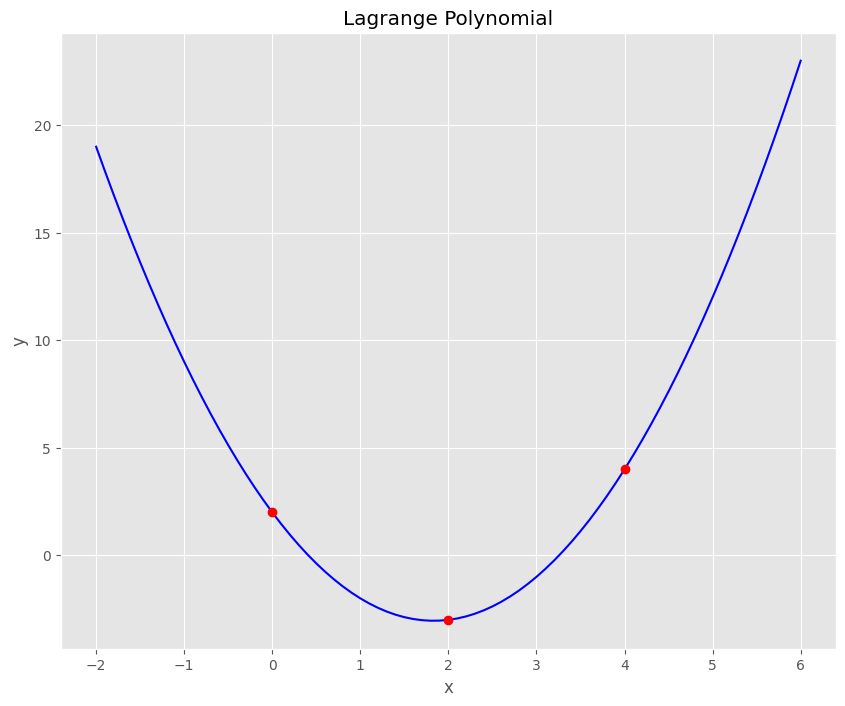

In [22]:
# dot product between the Lagrange basis polynomials and dependent data points
L = np.dot([P1, P2, P3], y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.show()

In [27]:
# Here, I develop a function that generates a Lagrange polynomial
def lagrange_poly(x, x_data, y_data):
    '''
    function to calculate lagrange polynomial
    '''
    x = np.asarray(x, dtype=float)
    L = np.zeros_like(x, dtype=float)      # initialize output array
    n = len(x_data)

    for i in range(n):
        li = np.ones_like(x, dtype=float)
        for j in range(n):
            if i != j:
                # Use x_data for the interpolation nodes
                li *= (x - x_data[j]) / (x_data[i] - x_data[j])
        L += li * y_data[i]

    return L

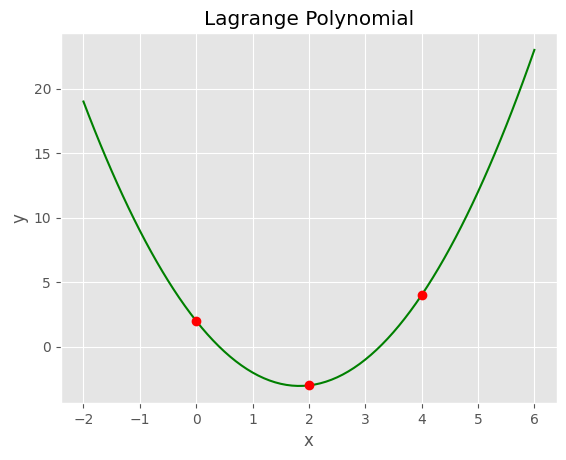

In [36]:
# We can plot this function
plt.plot(x_new, lagrange_poly(x_new, x, y), 'g', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.show()

In [13]:
from scipy.interpolate import lagrange

In [58]:
# Here, we can use the function from scipy
x_sin = np.arange(16)
y_sin = np.sin(x_sin)
f = lagrange(x_sin, y_sin)

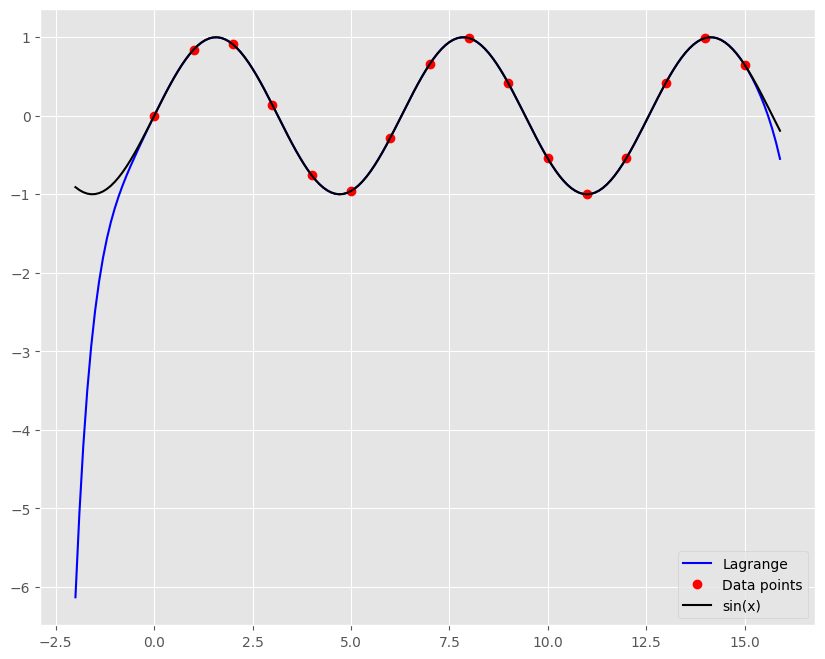

In [77]:
# comparing the Lagrange polynomial and the true curve, we can see that outside of the range of the data, the model begins to be inaccurate
fig = plt.figure(figsize = (10,8))
x_new_new = np.arange(-2, 16, 0.1)
plt.plot(x_new_new, f(x_new_new), 'b', label = 'Lagrange')
plt.plot(x_sin, y_sin, 'ro', label = 'Data points')
plt.plot(x_new_new, np.sin(x_new_new), 'k-', label = 'sin(x)')
plt.legend()

# **17.2 Newton's Polynomial Interpolation**


---

Newton's polynomial interpolation function can be defined as $f(x)=a_0 + a_1(x-x_0) + a_2(x-x_1)(x-x_0)+ \dots +a_n(x-x_n)\dots(x-x_1)(x-x_0)$ or $f(x) = \sum_{i=0}^na_in_i(x)$ for $n_i(x)=\Pi_{j=0}^{i-1}(x-x_j)$. The coefficients can be recursively found with the formula: $f[x_k,\dots,x_1,x_0] = \frac{f[x_k,\dots,x_1]-f[x_{k-1},\dots,x_0]}{x_k-x_0}$. Part of the practicality of this method is that additional points can be added without altering the coefficients for prior points.

In [63]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [66]:
# Here, we demonstrate an example of Newton's polynomial interpolation method and compare to the sin(x) function we've been doing throughout
# Dataset: x = [-9, -4, -1, 2, 5, 9] ; y = [2, 5, -1, -4, -11, 5]

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

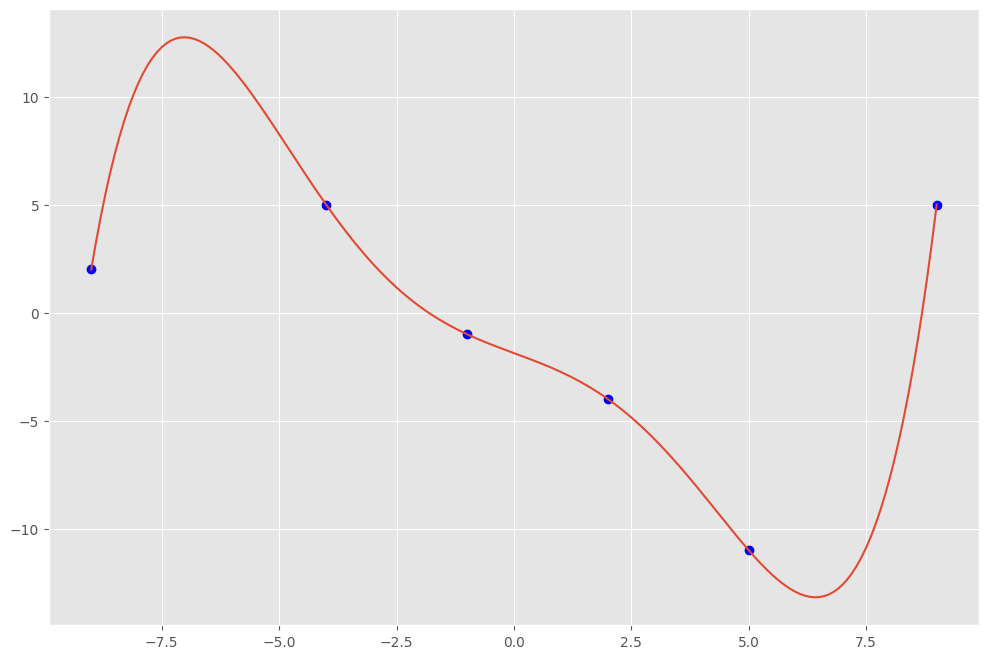

In [70]:
x = np.array([-9, -4, -1, 2, 5, 9])
y = np.array([2, 5, -1, -4, -11, 5])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-9, 9.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

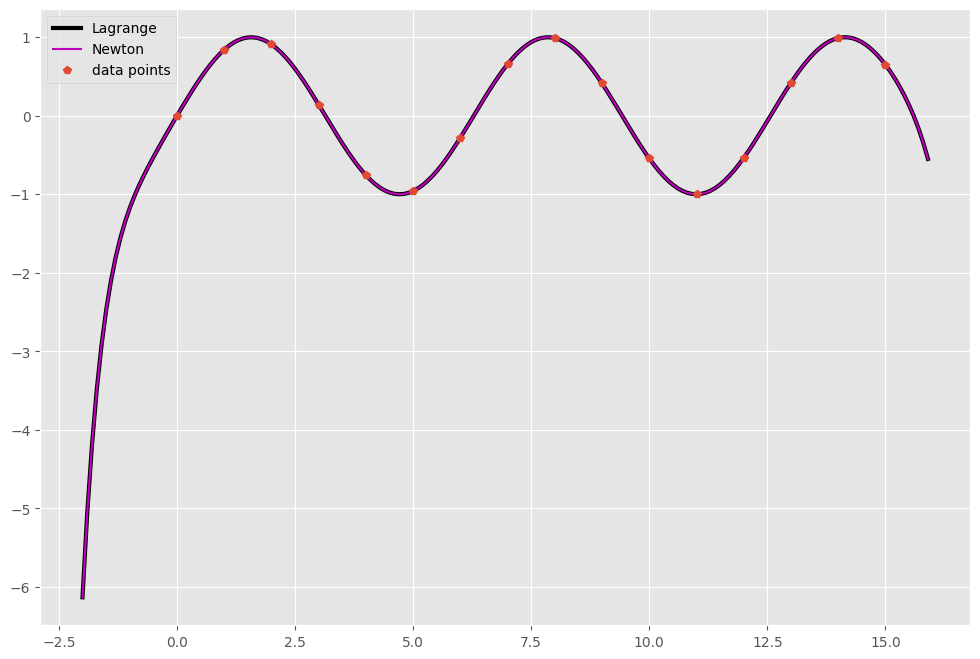

In [90]:
# get the divided difference coef
a_s = divided_diff(x_sin, y_sin)[0, :]

# evaluate on new data points
x_new = np.arange(-2, 16, .1)
y_new = newton_poly(a_s, x_sin, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x_new_new, f(x_new_new), 'k', label = 'Lagrange', linewidth = 3)
plt.plot(x_new, y_new, 'm-', label = 'Newton')
plt.plot(x_sin, y_sin, 'p', label = 'data points')
plt.legend()